## Transport properties of multiple mixtures

In this brief tutorial we will compute transport properties of multiple compositions of a gas using the [`SolutionArray`](https://cantera.org/documentation/docs-2.5/sphinx/html/cython/importing.html#representing-multiple-states) class of Cantera.

This will be done with the classical Berkley's [GRI-Mech 3.0](http://combustion.berkeley.edu/gri-mech/version30/text30.html) mechanims for combustion, which is provided with required parameters for computation of transport properties.

We start by importing the required packages for computations and visualization.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cantera as ct

%matplotlib inline

For producing smooth curves we use 100 states defined in what follows.

In [2]:
num_states = 100

To create a `SolutionArray` we must first create the phase we want to perform computations with.

The default phase in `gri30.yaml` mechanism in Cantera 2.5 already contains transport properties for mixture-averaged computations.

Utility class `SolutionArray` supports any shape (as supported by NumPy), but here we stick to a 1-D array for ease of plotting.

In [3]:
gas = ct.Solution('gri30.yaml')
sol = ct.SolutionArray(gas, shape=(num_states,))

You can inspect the default temperature and pressure as follows.

I won't do that for species because each array is 53-species-long and that would produce a large output.

In [4]:
sol.TP

(array([300., 300., 300., 300., 300., 300., 300., 300., 300., 300., 300.,
        300., 300., 300., 300., 300., 300., 300., 300., 300., 300., 300.,
        300., 300., 300., 300., 300., 300., 300., 300., 300., 300., 300.,
        300., 300., 300., 300., 300., 300., 300., 300., 300., 300., 300.,
        300., 300., 300., 300., 300., 300., 300., 300., 300., 300., 300.,
        300., 300., 300., 300., 300., 300., 300., 300., 300., 300., 300.,
        300., 300., 300., 300., 300., 300., 300., 300., 300., 300., 300.,
        300., 300., 300., 300., 300., 300., 300., 300., 300., 300., 300.,
        300., 300., 300., 300., 300., 300., 300., 300., 300., 300., 300.,
        300.]),
 array([101325., 101325., 101325., 101325., 101325., 101325., 101325.,
        101325., 101325., 101325., 101325., 101325., 101325., 101325.,
        101325., 101325., 101325., 101325., 101325., 101325., 101325.,
        101325., 101325., 101325., 101325., 101325., 101325., 101325.,
        101325., 101325., 101325.,

Now assume for some reason we need to compute properties for a $\mathrm{N_2-CH_4}$ mixture.

For the computations that follow we need to set their quantities in array, so we get their indices.

In [5]:
idx_n2 = gas.species_index('N2')
idx_ch4 = gas.species_index('CH4')

To cover the full composition range we use `np.linspace` to get `num_states` compositions for $\mathrm{CH_4}$.

In [6]:
x_ch4 = np.linspace(0.0, 1.0, num_states)

Next we allocate the matrix of compositions for all the states and all the species.

This zeros matrix must have as many rows as states and as many columns as species in the mechanism.

In [7]:
X = np.zeros((num_states, gas.n_species))

NumPy's useful array slicing can be used to set/compute composition for the species we retrieved the indices as follows.

In [8]:
X[:, idx_ch4] = x_ch4
X[:, idx_n2] = 1.0 - X[:, idx_ch4]

In `SolutionArray` you cannot set `X` alone as would be posible with `Solution` class.

In this case we repeat the temperature and pressure, then append the tuple with the newly computed `X` matrix.

In [9]:
sol.TPX = sol.T, sol.P, X

Below we display gas viscosity, heat capacity and thermal conductivity.

We could also have computed thermal difusivity using the density, but that is left as an exercise for you.

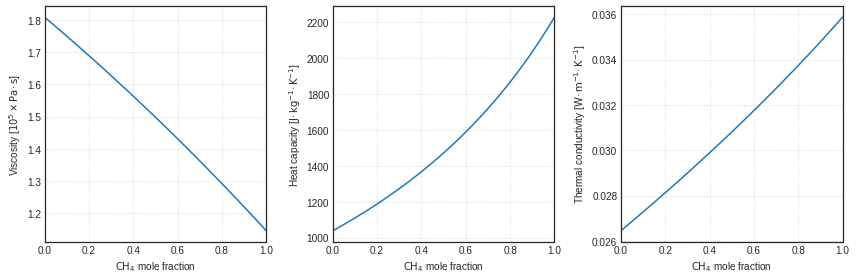

In [10]:
plt.close("all")
plt.style.use("seaborn-white")
plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.plot(x_ch4, sol.viscosity * 1e5)
plt.xlabel(r"$\mathrm{CH_4}$ mole fraction")
plt.ylabel(r"Viscosity [$10^5\times\mathrm{Pa\cdotp{}s}$]")
plt.grid(linestyle=":")
plt.xlim(0, 1)

plt.subplot(132)
plt.plot(x_ch4, sol.cp_mass)
plt.xlabel(r"$\mathrm{CH_4}$ mole fraction")
plt.ylabel(r"Heat capacity [$\mathrm{J\cdotp{}kg^{-1}\cdotp{}K^{-1}}$]")
plt.grid(linestyle=":")
plt.xlim(0, 1)

plt.subplot(133)
plt.plot(x_ch4, sol.thermal_conductivity)
plt.xlabel(r"$\mathrm{CH_4}$ mole fraction")
plt.ylabel(r"Thermal conductivity [$\mathrm{W\cdotp{}m^{-1}\cdotp{}K^{-1}}$]")
plt.grid(linestyle=":")
plt.xlim(0, 1)

plt.tight_layout()

There are many possibilities from here in terms of what you can compute.

I have personally used this to post-process OpenFOAM results read by [PyVista](https://docs.pyvista.org/) from VTK files.

You could also scan temperature and pressure ranges to evaluate the required properties.

Hope you have enjoyed, see you next time!